In [47]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

import pathlib
from openpyxl import Workbook  
import openpyxl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import xlrd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import LeakyReLU
print(tf.__version__)

2.0.0


In [48]:
emp1=pd.ExcelFile(r'C:\Users\LG\Desktop\Yungun\최소주파수\Resulttimevar0_1_data.xlsx')

In [49]:
dataset=emp1.parse('Sheet1')
dataset

,Metro,Yungnam,Chungnam,Honam,Gangwon,Inertia,Fre1,Fre2,Fre3,Fre4,...,Fre91,Fre92,Fre93,Fre94,Fre95,Fre96,Fre97,Fre98,Fre99,Fre100
0,230,2048,114,4107,266,87639.24219,59.999931,59.999779,59.999407,59.998787,...,59.506284,59.504380,59.502993,59.503199,59.503415,59.503497,59.502472,59.500571,59.496524,59.492106
1,451,2880,963,2430,951,86588.24219,60.000000,59.999858,59.999494,59.998843,...,59.487718,59.486155,59.486053,59.485549,59.484866,59.483653,59.481523,59.477929,59.473460,59.468756
2,374,1628,548,3473,547,87639.24219,59.999916,59.999743,59.999341,59.998661,...,59.489833,59.488649,59.488155,59.488026,59.488272,59.487895,59.485169,59.481775,59.477293,59.472630
3,753,468,443,1176,767,91266.25000,59.999974,59.999904,59.999743,59.999457,...,59.711995,59.712594,59.711281,59.708362,59.704555,59.700741,59.697898,59.697073,59.698948,59.701419
4,697,2883,375,2368,137,87639.24219,59.999919,59.999744,59.999308,59.998638,...,59.466373,59.465559,59.465075,59.464856,59.464164,59.461922,59.457765,59.453585,59.447803,59.443785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107,431,348,803,4337,843,87639.24219,59.999935,59.999793,59.999455,59.998862,...,59.561864,59.558827,59.555210,59.554247,59.554101,59.554710,59.556509,59.557984,59.557902,59.555911
1108,131,249,236,1336,1224,91266.25000,59.999956,59.999858,59.999604,59.999221,...,59.663709,59.662374,59.658647,59.656074,59.651443,59.649817,59.648480,59.648869,59.651940,59.655448
1109,414,712,49,1250,456,91266.25000,59.999936,59.999806,59.999505,59.998976,...,59.592312,59.587273,59.584511,59.582980,59.582571,59.585237,59.587388,59.590083,59.592499,59.591629
1110,322,1148,555,1057,1322,89745.25000,59.999932,59.999793,59.999454,59.998943,...,59.560221,59.556646,59.554326,59.552897,59.553062,59.555845,59.556968,59.559440,59.558476,59.557575


In [50]:
train_dataset = dataset.sample(frac=0.8,random_state=0) #80퍼센트 정보를 랜덤하게 가져옴
test_dataset = dataset.drop(train_dataset.index)

In [51]:
train_stats = train_dataset.describe()
for i in range(1,101):
    train_stats.pop("Fre%d"%i)
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Metro,890.0,457.917978,266.850752,0.00000,218.25000,451.00000,702.00,910.00000
Yungnam,890.0,1738.503371,1007.899434,6.00000,885.50000,1684.00000,2629.25,3570.00000
Chungnam,890.0,493.592135,291.633619,1.00000,232.00000,505.50000,746.00,1000.00000
Honam,890.0,2141.210112,1206.418331,13.00000,1101.00000,2070.50000,3140.75,4348.00000
Gangwon,890.0,697.303371,400.425067,0.00000,357.25000,699.50000,1039.25,1400.00000
Inertia,890.0,89053.164362,1524.498247,84488.24219,87639.24219,88694.24219,89745.25,93832.26563


In [52]:
train_dataset

,Metro,Yungnam,Chungnam,Honam,Gangwon,Inertia,Fre1,Fre2,Fre3,Fre4,...,Fre91,Fre92,Fre93,Fre94,Fre95,Fre96,Fre97,Fre98,Fre99,Fre100
795,493,2675,713,1967,991,87639.24219,59.999940,59.999803,59.999486,59.998912,...,59.542996,59.539869,59.538275,59.538087,59.539151,59.540715,59.541693,59.541033,59.539318,59.536391
512,167,1750,194,3996,346,88694.24219,59.999977,59.999901,59.999723,59.999421,...,59.737220,59.733521,59.728578,59.723424,59.719165,59.716712,59.716565,59.718593,59.722040,59.725751
186,787,1795,948,3302,177,87639.24219,59.999949,59.999829,59.999554,59.999045,...,59.579435,59.575663,59.573129,59.571488,59.572704,59.574092,59.576916,59.577957,59.578149,59.576720
1097,736,684,231,1887,694,89745.25000,59.999917,59.999755,59.999377,59.998795,...,59.522761,59.521051,59.520469,59.520574,59.521355,59.522294,59.522557,59.521213,59.517688,59.513276
747,11,2807,13,1338,514,89745.25000,59.999946,59.999818,59.999521,59.998997,...,59.547426,59.543929,59.542137,59.541903,59.542837,59.544273,59.545525,59.545672,59.544022,59.540524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,752,2828,253,2067,1014,87639.24219,59.999947,59.999820,59.999517,59.999002,...,59.550447,59.547037,59.545489,59.545650,59.546625,59.547955,59.549071,59.549049,59.547299,59.543899
217,427,2548,813,3283,24,87639.24219,59.999956,59.999841,59.999573,59.999113,...,59.573512,59.568987,59.566300,59.565542,59.566647,59.568798,59.571129,59.572466,59.572173,59.569349
539,199,3032,18,622,844,89745.25000,59.999952,59.999833,59.999544,59.999092,...,59.564127,59.560876,59.558127,59.557554,59.558648,59.560208,59.561751,59.562433,59.561689,59.559126
981,775,1447,862,3898,34,87639.24219,59.999947,59.999827,59.999547,59.999031,...,59.580756,59.576331,59.573166,59.572294,59.572455,59.574494,59.576754,59.577983,59.578635,59.577192


In [53]:
train_out = train_dataset.copy()
test_out= test_dataset.copy()

In [54]:
train_out.pop('Metro') 
train_out.pop('Yungnam')
train_out.pop('Chungnam')
train_out.pop('Honam')
train_out.pop('Gangwon')
train_out.pop('Inertia')
train_out

,Fre1,Fre2,Fre3,Fre4,Fre5,Fre6,Fre7,Fre8,Fre9,Fre10,...,Fre91,Fre92,Fre93,Fre94,Fre95,Fre96,Fre97,Fre98,Fre99,Fre100
795,59.999940,59.999803,59.999486,59.998912,59.998142,59.996986,59.995586,59.993730,59.991754,59.989485,...,59.542996,59.539869,59.538275,59.538087,59.539151,59.540715,59.541693,59.541033,59.539318,59.536391
512,59.999977,59.999901,59.999723,59.999421,59.998940,59.998295,59.997397,59.996238,59.994888,59.993429,...,59.737220,59.733521,59.728578,59.723424,59.719165,59.716712,59.716565,59.718593,59.722040,59.725751
186,59.999949,59.999829,59.999554,59.999045,59.998366,59.997339,59.996084,59.994404,59.992588,59.990478,...,59.579435,59.575663,59.573129,59.571488,59.572704,59.574092,59.576916,59.577957,59.578149,59.576720
1097,59.999917,59.999755,59.999377,59.998795,59.997905,59.996699,59.995189,59.993447,59.991312,59.988561,...,59.522761,59.521051,59.520469,59.520574,59.521355,59.522294,59.522557,59.521213,59.517688,59.513276
747,59.999946,59.999818,59.999521,59.998997,59.998279,59.997207,59.995893,59.994143,59.992249,59.990063,...,59.547426,59.543929,59.542137,59.541903,59.542837,59.544273,59.545525,59.545672,59.544022,59.540524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,59.999947,59.999820,59.999517,59.999002,59.998199,59.997174,59.995715,59.994039,59.991954,59.989882,...,59.550447,59.547037,59.545489,59.545650,59.546625,59.547955,59.549071,59.549049,59.547299,59.543899
217,59.999956,59.999841,59.999573,59.999113,59.998378,59.997446,59.996113,59.994573,59.992649,59.990724,...,59.573512,59.568987,59.566300,59.565542,59.566647,59.568798,59.571129,59.572466,59.572173,59.569349
539,59.999952,59.999833,59.999544,59.999092,59.998406,59.997411,59.996178,59.994520,59.992705,59.990587,...,59.564127,59.560876,59.558127,59.557554,59.558648,59.560208,59.561751,59.562433,59.561689,59.559126
981,59.999947,59.999827,59.999547,59.999031,59.998341,59.997299,59.996028,59.994331,59.992507,59.990393,...,59.580756,59.576331,59.573166,59.572294,59.572455,59.574494,59.576754,59.577983,59.578635,59.577192


In [55]:
test_out.pop('Metro') 
test_out.pop('Yungnam')
test_out.pop('Chungnam')
test_out.pop('Honam')
test_out.pop('Gangwon')
test_out.pop('Inertia')
test_out

,Fre1,Fre2,Fre3,Fre4,Fre5,Fre6,Fre7,Fre8,Fre9,Fre10,...,Fre91,Fre92,Fre93,Fre94,Fre95,Fre96,Fre97,Fre98,Fre99,Fre100
11,59.999939,59.999806,59.999464,59.998935,59.998182,59.997051,59.995680,59.993860,59.991920,59.989688,...,59.556494,59.552855,59.550588,59.549876,59.550670,59.552325,59.553951,59.554811,59.554041,59.550784
19,59.999933,59.999795,59.999458,59.998947,59.998123,59.997088,59.995710,59.993995,59.992242,59.990258,...,59.565600,59.561066,59.557249,59.555394,59.556200,59.557687,59.559095,59.561860,59.561240,59.560783
23,59.999971,59.999880,59.999660,59.999280,59.998672,59.997864,59.996807,59.995514,59.993950,59.992175,...,59.724529,59.719367,59.713915,59.709330,59.706592,59.706252,59.708217,59.711725,59.715576,59.718472
24,59.999934,59.999792,59.999436,59.998897,59.998023,59.996917,59.995380,59.993660,59.991614,59.989706,...,59.555854,59.551461,59.548526,59.547416,59.547847,59.549205,59.550692,59.551391,59.550739,59.548978
25,59.999929,59.999796,59.999509,59.999014,59.998315,59.997294,59.996058,59.994405,59.992638,59.990575,...,59.598920,59.593774,59.589318,59.586505,59.585948,59.587954,59.590959,59.591925,59.592684,59.593456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,59.999948,59.999826,59.999540,59.999039,59.998282,59.997299,59.995903,59.994293,59.992284,59.990281,...,59.559457,59.556081,59.554272,59.554529,59.555746,59.557415,59.559305,59.559301,59.558053,59.554317
1094,59.999948,59.999826,59.999538,59.999017,59.998312,59.997250,59.995953,59.994217,59.992345,59.990170,...,59.562805,59.559112,59.557444,59.557471,59.558284,59.560650,59.561842,59.562653,59.561279,59.557839
1098,59.999945,59.999814,59.999465,59.998954,59.998106,59.997024,59.995501,59.993767,59.991636,59.989550,...,59.544242,59.541011,59.539563,59.539617,59.540357,59.541628,59.542495,59.542254,59.540204,59.536547
1101,59.999978,59.999915,59.999773,59.999535,59.999176,59.998662,59.997937,59.996962,59.995683,59.994253,...,59.721490,59.721815,59.724840,59.719959,59.718463,59.717001,59.713186,59.709900,59.708884,59.710103


In [56]:
train_input = train_dataset.copy()
test_input = test_dataset.copy()

In [57]:
for i in range(1,101):
    train_input.pop('Fre%d'%i)
train_input

for i in range(1,101):
    test_input.pop('Fre%d'%i)
test_input

,Metro,Yungnam,Chungnam,Honam,Gangwon,Inertia
11,879,2116,687,2759,440,87639.24219
19,849,473,557,2107,471,89745.25000
23,107,3405,960,4334,708,85540.25000
24,427,187,337,3729,957,88694.24219
25,124,3058,541,4311,1256,85540.25000
...,...,...,...,...,...,...
1090,237,2919,255,2475,1115,87639.24219
1094,422,2678,46,2520,1301,87639.24219
1098,344,1980,79,4140,384,87639.24219
1101,531,1192,679,558,807,91266.25000


In [58]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']     #std =standard deviation 표준편차 
normed_train_data = norm(train_input)
normed_test_data = norm(test_input)

In [59]:
normed_train_data 

,Metro,Yungnam,Chungnam,Honam,Gangwon,Inertia
795,0.131467,0.929157,0.752341,-0.144403,0.733462,-0.927467
512,-1.090190,0.011407,-1.027289,1.537435,-0.877326,-0.235436
186,1.233206,0.056054,1.558146,0.962179,-1.299378,-0.927467
1097,1.042088,-1.046239,-0.900418,-0.210715,-0.008250,0.453976
747,-1.674786,1.060122,-1.647931,-0.665781,-0.457772,0.453976
...,...,...,...,...,...,...
663,1.102047,1.080958,-0.824981,-0.061513,0.790901,-0.927467
217,-0.115862,0.803152,1.095237,0.946429,-1.681472,-0.927467
539,-0.970273,1.283359,-1.630786,-1.259273,0.366352,0.453976
981,1.188237,-0.289219,1.263256,1.456203,-1.656498,-0.927467


In [78]:
normed_train_data = normed_train_data.reshape((x.shape[0], x.shape[1], 1)) 

AttributeError: 'DataFrame' object has no attribute 'reshape'

In [60]:
train_outs = train_out.describe()
train_outs = train_outs.transpose()
train_outs

,count,mean,std,min,25%,50%,75%,max
Fre1,890.0,59.999951,0.000089,59.997374,59.999938,59.999956,59.999970,60.000070
Fre2,890.0,59.999837,0.000086,59.997830,59.999800,59.999843,59.999882,60.000017
Fre3,890.0,59.999564,0.000172,59.996208,59.999464,59.999572,59.999678,59.999852
Fre4,890.0,59.999107,0.000317,59.993644,59.998905,59.999114,59.999325,59.999664
Fre5,890.0,59.998431,0.000554,59.988989,59.998066,59.998445,59.998827,59.999442
...,...,...,...,...,...,...,...,...
Fre96,890.0,59.594140,0.075542,59.410632,59.537716,59.586558,59.645457,59.797659
Fre97,890.0,59.594435,0.075260,59.404509,59.538754,59.588936,59.645516,59.800275
Fre98,890.0,59.594902,0.076174,59.397268,59.538280,59.591629,59.647317,59.801060
Fre99,890.0,59.594960,0.078067,59.392079,59.536524,59.592695,59.650287,59.799614


In [61]:
def norm2(x):
    return (x - train_outs['mean']) / train_outs['std']     #std =standard deviation 표준편차 
normed_train_outs = norm2(train_out)
normed_test_outs = norm2(test_out)

In [72]:
def build_model():
    model = keras.Sequential([
        layers.LSTM(30, activation='relu', input_shape=[len(train_input.keys()),1]),
        layers.Dense(1000, activation = 'relu'),
        layers.Dense(100)
        ])
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae', 'mse','accuracy',])
    return model

In [73]:
model = build_model()

In [74]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 30)                3840      
_________________________________________________________________
dense_13 (Dense)             (None, 1000)              31000     
_________________________________________________________________
dense_14 (Dense)             (None, 100)               100100    
Total params: 134,940
Trainable params: 134,940
Non-trainable params: 0
_________________________________________________________________


In [75]:
example_batch = normed_train_data[:10]
example_batch

,Metro,Yungnam,Chungnam,Honam,Gangwon,Inertia
795,0.131467,0.929157,0.752341,-0.144403,0.733462,-0.927467
512,-1.090190,0.011407,-1.027289,1.537435,-0.877326,-0.235436
186,1.233206,0.056054,1.558146,0.962179,-1.299378,-0.927467
1097,1.042088,-1.046239,-0.900418,-0.210715,-0.008250,0.453976
747,-1.674786,1.060122,-1.647931,-0.665781,-0.457772,0.453976
958,1.562979,0.747591,-0.876415,0.718482,-0.148101,-0.927467
1079,-0.692964,1.371661,1.170674,1.237373,0.488722,-2.304309
911,1.090805,-1.465923,1.311261,1.500135,-0.914786,-0.235436
938,0.959645,-0.607703,-1.641073,0.656315,-1.364309,0.453976
204,-1.161391,1.788370,0.460879,0.362055,-1.484181,-0.927467


In [76]:
example_result = model.predict(example_batch)         #predict method
example_result

ValueError: Error when checking input: expected lstm_1_input to have 3 dimensions, but got array with shape (10, 6)

In [77]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 300
# validation_split 은 20퍼센트가 tsst가 된다
history = model.fit(
    normed_train_data, normed_train_outs,
    epochs=EPOCHS, validation_split = 0.2, verbose=0,
    callbacks=[PrintDot()])

ValueError: Error when checking input: expected lstm_1_input to have 3 dimensions, but got array with shape (890, 6)

In [40]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

,loss,mae,mse,accuracy,val_loss,val_mae,val_mse,val_accuracy,epoch
0,0.012804,0.084186,0.012804,0.515449,0.113178,0.189831,0.113178,0.404494,0
1,0.009118,0.069585,0.009118,0.537921,0.127220,0.226709,0.127220,0.404494,1
2,0.011819,0.082149,0.011819,0.544944,0.108381,0.185477,0.108381,0.415730,2
3,0.010576,0.074511,0.010576,0.544944,0.114050,0.182695,0.114050,0.387640,3
4,0.011038,0.079161,0.011038,0.547753,0.112484,0.185264,0.112484,0.415730,4
...,...,...,...,...,...,...,...,...,...
295,0.005008,0.052675,0.005008,0.634831,0.111628,0.193346,0.111628,0.393258,295
296,0.005695,0.056163,0.005695,0.661517,0.113342,0.183296,0.113342,0.387640,296
297,0.003981,0.046672,0.003981,0.647472,0.107227,0.175479,0.107227,0.398876,297
298,0.005627,0.053901,0.005627,0.643258,0.118661,0.190896,0.118661,0.404494,298


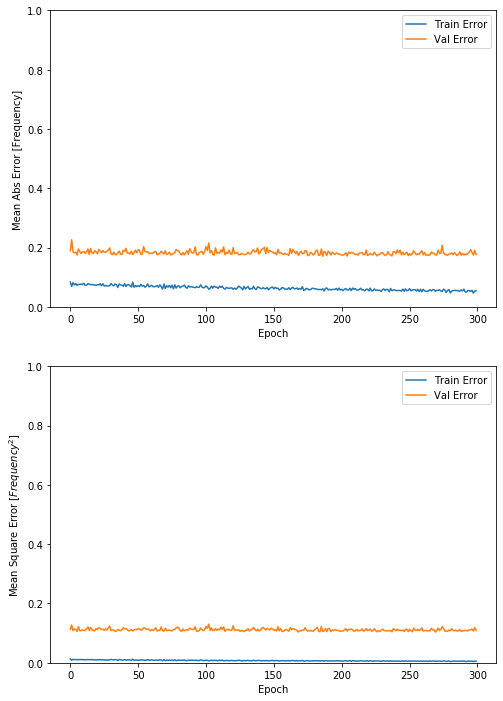

In [41]:
import matplotlib.pyplot as plt

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    plt.figure(figsize=(8,12))
    plt.subplot(2,1,1)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [Frequency]')
    plt.plot(hist['epoch'], hist['mae'],label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],label = 'Val Error')
    plt.ylim([0,1])
    plt.legend()
    
    plt.subplot(2,1,2)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$Frequency^2$]')
    
    plt.plot(hist['epoch'], hist['mse'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
    plt.ylim([0,1])
    plt.legend()
    plt.show()

plot_history(history)

In [42]:
test_predictions = model.predict(normed_test_data).flatten()


In [43]:
def re(x):
    return (x * train_outs['std']) + train_outs['mean']     #std =standard deviation 표준편차 


In [44]:
#for i in range(1,222):
#    globals()['test_predictions{}'.format(i)] = re(test_predictions[(i-1)*100:(i)*100])

In [45]:
x = []
for i in range (100):
    x.append(0.1*i)
    
print(type(x))    


<class 'list'>


In [46]:
p = test_out.copy()

In [32]:
def plotgraph(i):
    plt.figure(figsize=(20,12))
    plt.subplot(4,1,1)
    plt.plot(x,re(test_predictions[(i-1)*100:(i)*100]),label = 'Predict%d'%i)
    plt.plot(x,p[(i-1):(i)].transpose(), label = 'real%d'%i)
    plt.xlabel('Time')
    plt.ylabel('Predictions [Frequency]')
    plt.legend()
    plt.show()


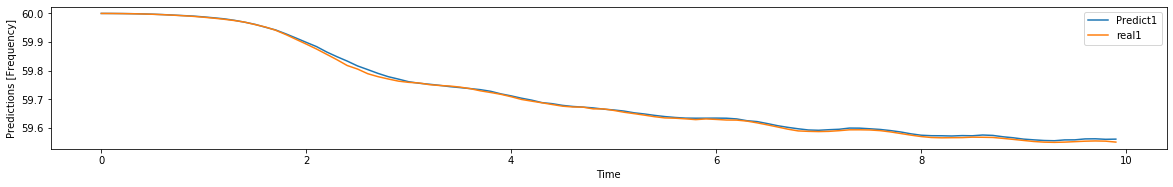

    Metro  Yungnam  Chungnam  Honam  Gangwon      Inertia
11    879     2116       687   2759      440  87639.24219


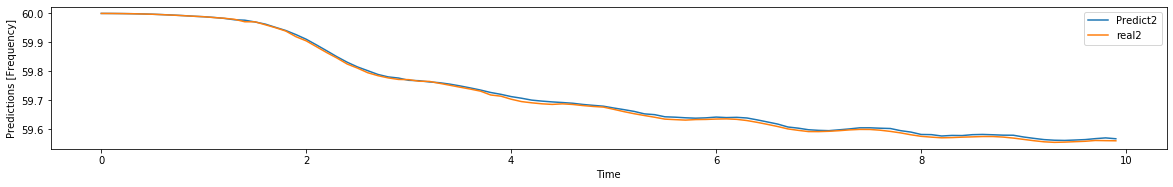

    Metro  Yungnam  Chungnam  Honam  Gangwon   Inertia
19    849      473       557   2107      471  89745.25


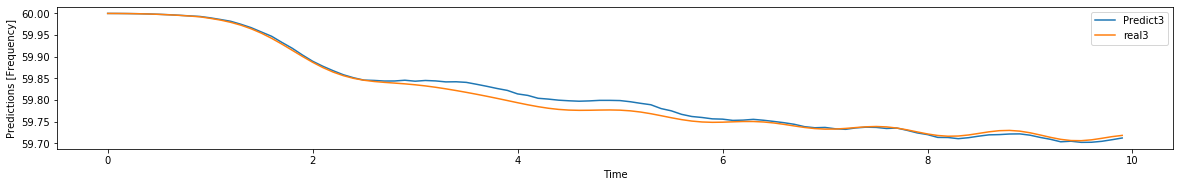

    Metro  Yungnam  Chungnam  Honam  Gangwon   Inertia
23    107     3405       960   4334      708  85540.25


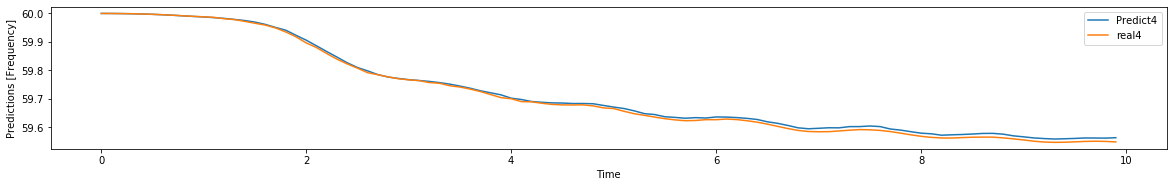

    Metro  Yungnam  Chungnam  Honam  Gangwon      Inertia
24    427      187       337   3729      957  88694.24219


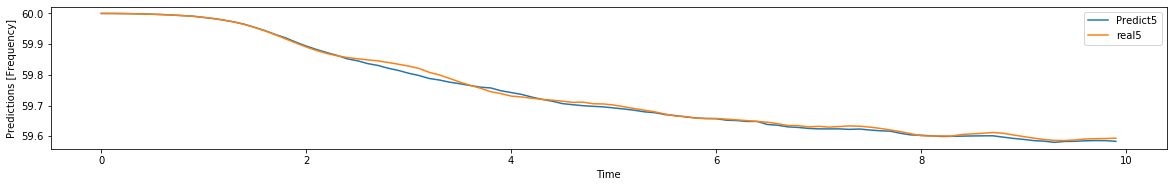

    Metro  Yungnam  Chungnam  Honam  Gangwon   Inertia
25    124     3058       541   4311     1256  85540.25


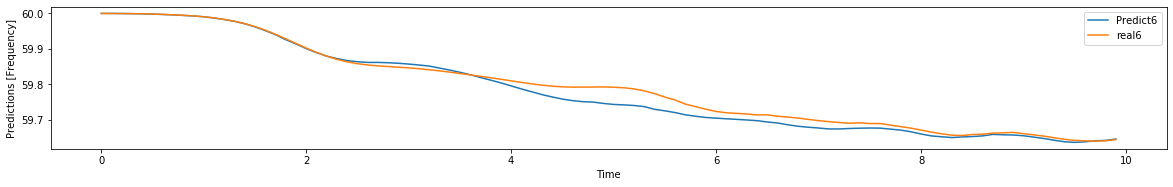

    Metro  Yungnam  Chungnam  Honam  Gangwon   Inertia
28    514     2829        21   1479      339  89745.25


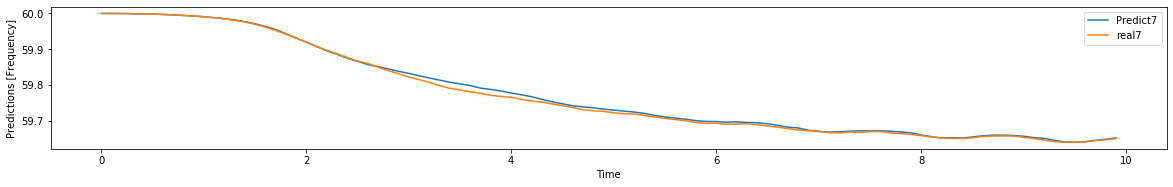

    Metro  Yungnam  Chungnam  Honam  Gangwon   Inertia
32    177     2076       174    801      312  91266.25


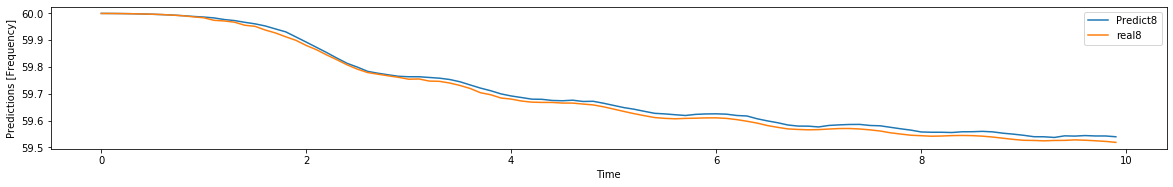

    Metro  Yungnam  Chungnam  Honam  Gangwon   Inertia
36    623     1275       515    359     1378  89745.25


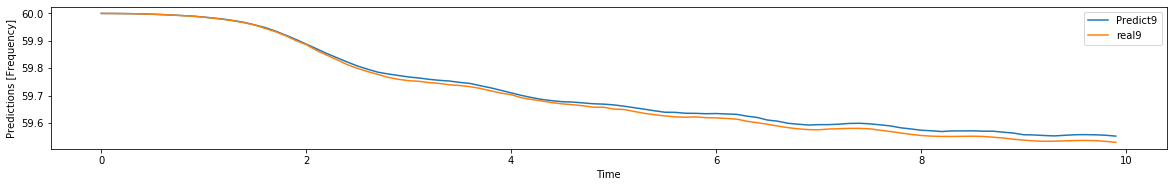

    Metro  Yungnam  Chungnam  Honam  Gangwon      Inertia
41    859     3149        71   2082      680  87639.24219


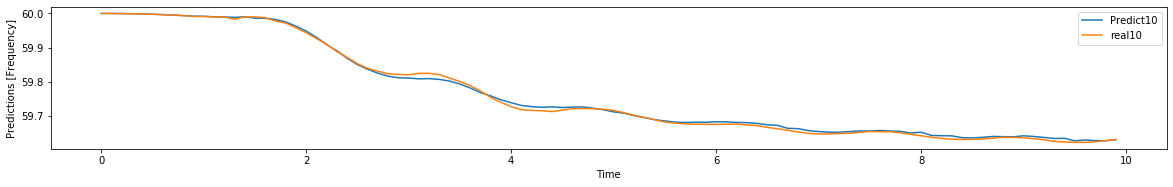

    Metro  Yungnam  Chungnam  Honam  Gangwon   Inertia
43    110      100       701   1027      997  91266.25


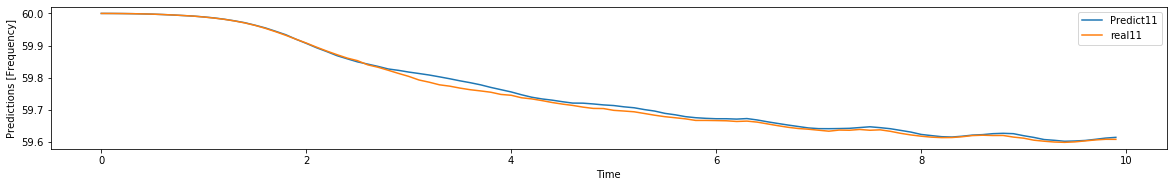

    Metro  Yungnam  Chungnam  Honam  Gangwon      Inertia
57    700     2113       943   2433      911  87639.24219


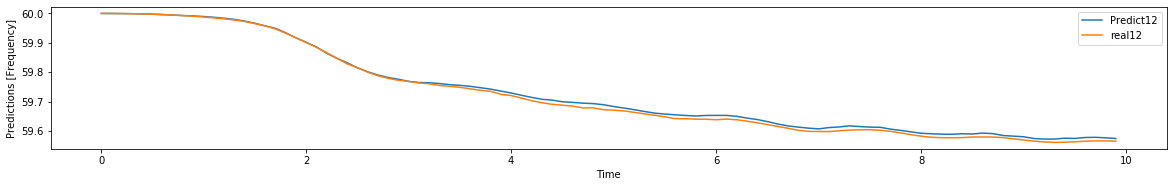

    Metro  Yungnam  Chungnam  Honam  Gangwon      Inertia
58    905     1919       691   1871      420  88694.24219


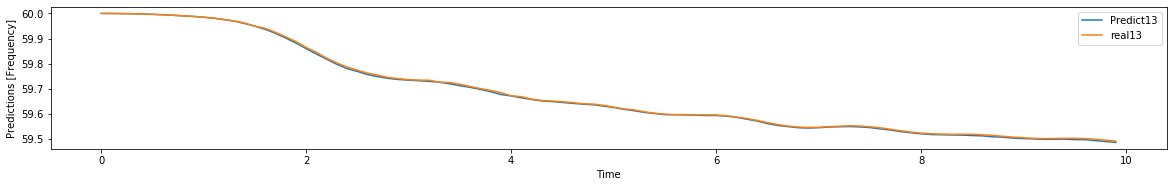

    Metro  Yungnam  Chungnam  Honam  Gangwon      Inertia
67    267     1754       681   3273      636  87639.24219


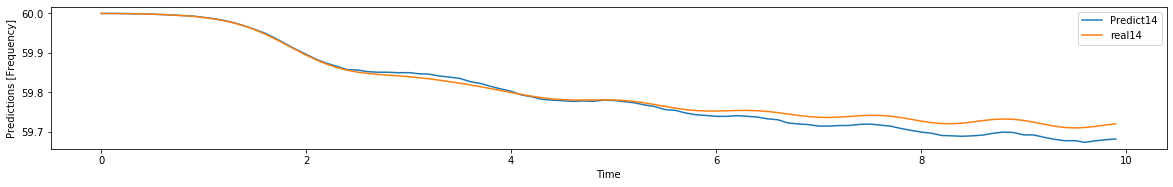

    Metro  Yungnam  Chungnam  Honam  Gangwon      Inertia
72    232     3290       196   2299     1356  87639.24219


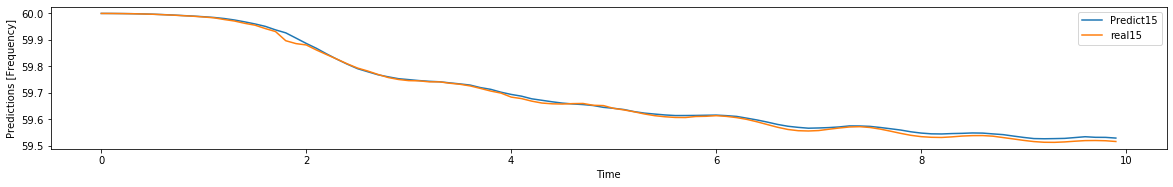

    Metro  Yungnam  Chungnam  Honam  Gangwon      Inertia
80    770     2788       408    334     1206  88694.24219


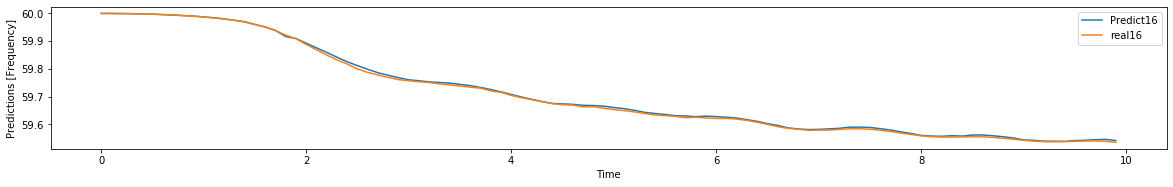

    Metro  Yungnam  Chungnam  Honam  Gangwon      Inertia
84    713     3239       690    631      478  88694.24219


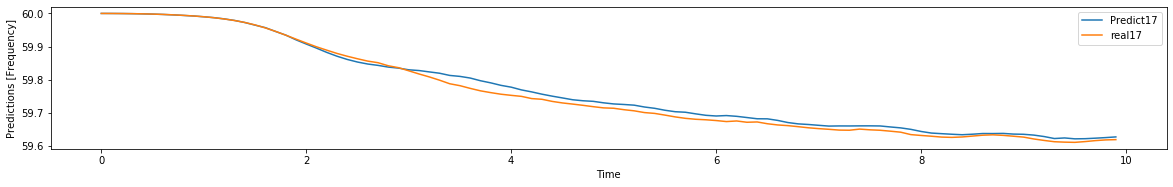

    Metro  Yungnam  Chungnam  Honam  Gangwon   Inertia
86    802     3018       141    231      874  89745.25


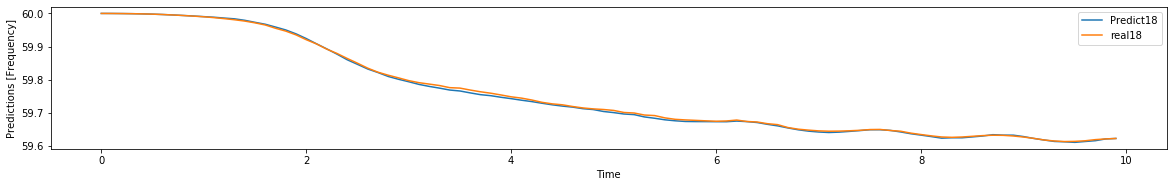

    Metro  Yungnam  Chungnam  Honam  Gangwon   Inertia
87    213      801       539   2341      985  89745.25


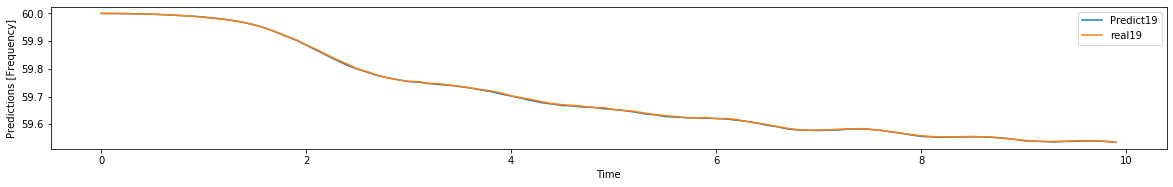

    Metro  Yungnam  Chungnam  Honam  Gangwon      Inertia
91    598     3050       755   1803      615  87639.24219


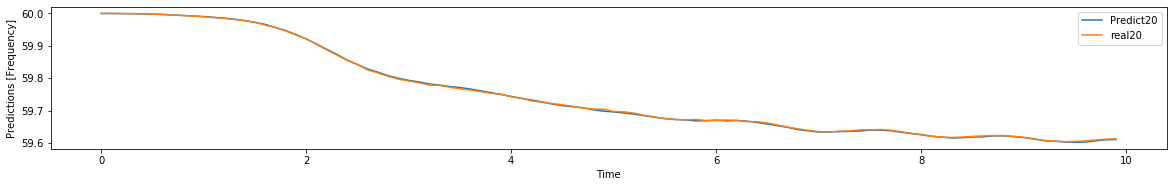

    Metro  Yungnam  Chungnam  Honam  Gangwon   Inertia
94    719     1059       269   1865      914  89745.25


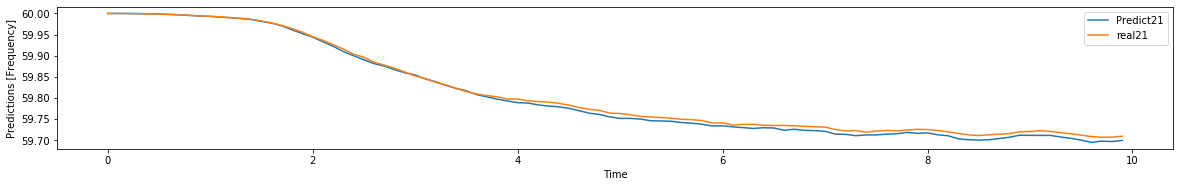

    Metro  Yungnam  Chungnam  Honam  Gangwon   Inertia
98    568       51       210   1821     1026  91266.25


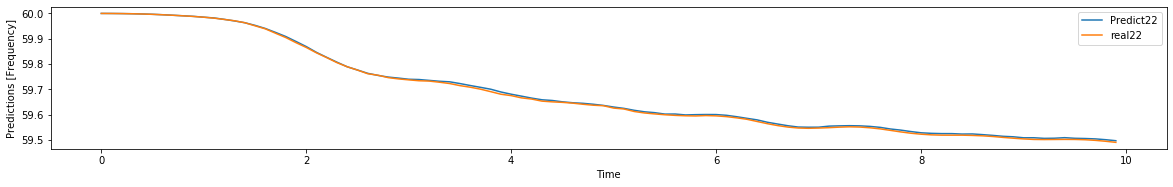

    Metro  Yungnam  Chungnam  Honam  Gangwon      Inertia
99     52     1602       405   3729      838  87639.24219


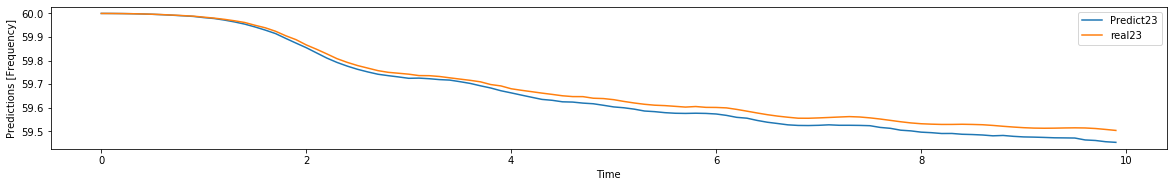

     Metro  Yungnam  Chungnam  Honam  Gangwon   Inertia
110    580     3421       954   3879       47  85540.25


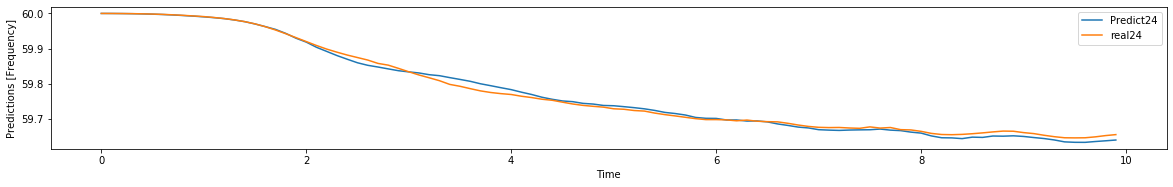

     Metro  Yungnam  Chungnam  Honam  Gangwon   Inertia
111    135     1631       297   1478       12  91266.25


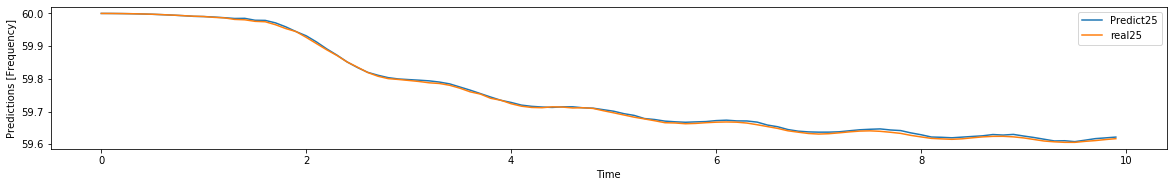

     Metro  Yungnam  Chungnam  Honam  Gangwon   Inertia
115    338      347       132   1266      808  91266.25


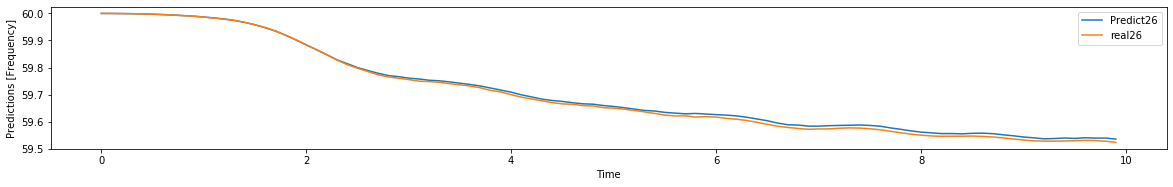

     Metro  Yungnam  Chungnam  Honam  Gangwon      Inertia
117    217     3285       279    973      965  88694.24219


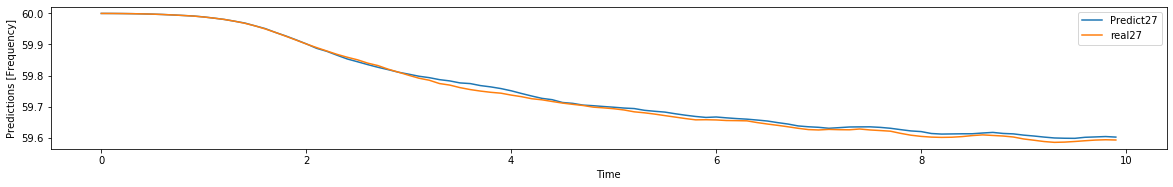

     Metro  Yungnam  Chungnam  Honam  Gangwon      Inertia
121    672     3384       942    988     1115  87639.24219


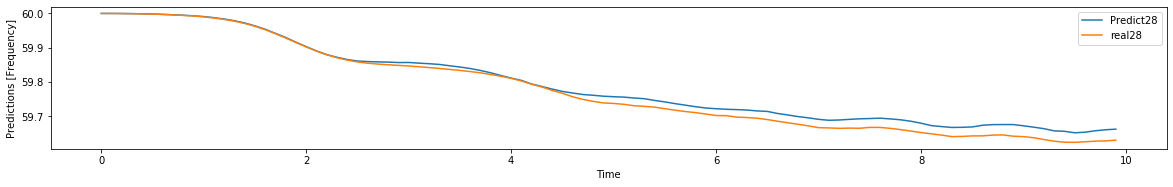

     Metro  Yungnam  Chungnam  Honam  Gangwon      Inertia
123    557     2209       210   2637      664  88694.24219


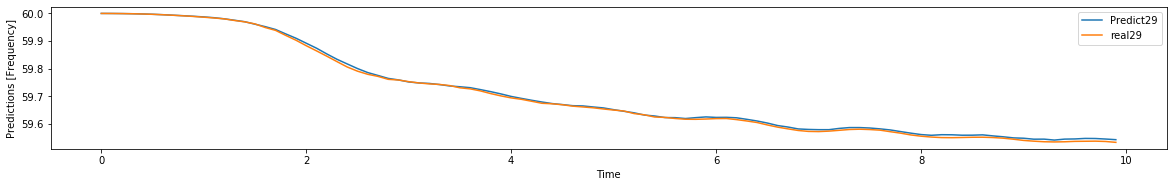

     Metro  Yungnam  Chungnam  Honam  Gangwon      Inertia
128    816     1438       700   3436      390  87639.24219


In [33]:
for j in range(1,30):
    plotgraph(j)
    print(test_input[j-1:j])